In [240]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [7]:
df = pd.read_csv('https://web.stanford.edu/~hastie/ElemStatLearn/datasets/spam.data',
            header=None, sep=' ', engine='python')

In [12]:
df.shape

(4601, 58)

In [18]:
x = df.drop(57,axis = 1)
y = df[[57]]

## Fit LDA

In [175]:
lda = LinearDiscriminantAnalysis()
train_error_LDA = []
test_error_LDA = []
def FitLda(x,y):
    for i in range(101):
        x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 2300, random_state=i)
        model = lda.fit(x_train,y_train.values.ravel())
        pred_test=model.predict(x_test)
        pred_train=model.predict(x_train)
        test_error_LDA.append(1-accuracy_score(y_test,pred_test))
        train_error_LDA.append(1-accuracy_score(y_train,pred_train))
    return

## QDA

In [194]:
qda = QuadraticDiscriminantAnalysis()
train_error_QDA = []
test_error_QDA = []
def FitQda(x,y):
    for i in range(101):
        x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 2300, random_state=i)
        x_train = x_train.apply(lambda i: i + np.random.normal(0,0.001,1))
        model = qda.fit(x_train,y_train.values.ravel())
        pred_test=model.predict(x_test)
        pred_train=model.predict(x_train)
        test_error_QDA.append(1-accuracy_score(y_test,pred_test))
        train_error_QDA.append(1-accuracy_score(y_train,pred_train))
    return

## KNN

In [177]:
knn = KNeighborsClassifier()
k_range = list(range(1, 11))
param_grid = dict(n_neighbors=k_range)
train_error_KNN = []
test_error_KNN = []
best_params = []
def FitKnn(x,y):
    for i in range(101): 
        x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 2300, random_state=i)
        grid = GridSearchCV(knn, param_grid, scoring = "accuracy",cv = 10)
        knn_fit = grid.fit(x_train,y_train.values.ravel())
        pred_test = knn_fit.predict(x_test)
        pred_train = knn_fit.predict(x_train)
        test_error_KNN.append(1-accuracy_score(y_test,pred_test))
        train_error_KNN.append(1-accuracy_score(y_train,pred_train))
        best_params.append(grid.best_params_)
    return

## LASSO Logistic

In [216]:
log = LogisticRegression(solver='liblinear', multi_class='auto',max_iter = 2000)
grid_lasso={"C":np.logspace(-3,3,7), "penalty":["l1"]}
train_error_lasso = []
test_error_lasso = []
def FitLasso(x,y):
    for i in range(101): 
        x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 2300, random_state=i)
        log_cv=GridSearchCV(log,grid,cv=10)
        log_fit = log_cv.fit(x_train,y_train.values.ravel())
        pred_test = log_fit.predict(x_test)
        pred_train = log_fit.predict(x_train)
        test_error_lasso.append(1-accuracy_score(y_test,pred_test))
        train_error_lasso.append(1-accuracy_score(y_train,pred_train))
    return

## Ridge Logistic

In [212]:
log = LogisticRegression(solver='liblinear', multi_class='auto',max_iter=2000)
grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}
train_error_ridge = []
test_error_ridge = []
def FitRidge(x,y):
    for i in range(101): 
        x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 2300, random_state=i)
        log_cv=GridSearchCV(log,grid,cv=10)
        log_fit = log_cv.fit(x_train,y_train.values.ravel())
        pred_test = log_fit.predict(x_test)
        pred_train = log_fit.predict(x_train)
        test_error_ridge.append(1-accuracy_score(y_test,pred_test))
        train_error_ridge.append(1-accuracy_score(y_train,pred_train))
    return

## Random Forest

In [237]:
train_error_tree = []
test_error_tree = []
def FitTree(x,y):
    for i in range(101): 
        x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 2300, random_state=i)
        model = RandomForestClassifier(n_estimators=300,bootstrap = True,max_features = 'sqrt')
        tree_fit = model.fit(x_train,y_train.values.ravel())
        pred_test = tree_fit.predict(x_test)
        pred_train = tree_fit.predict(x_train)
        test_error_tree.append(1-accuracy_score(y_test,pred_test))
        train_error_tree.append(1-accuracy_score(y_train,pred_train))
    return   

## Plot Test and Training Errors

In [253]:
df = pd.DataFrame({'train_error_LDA':train_error_LDA,'train_error_QDA':train_error_QDA,
                  'train_error_KNN':train_error_KNN,'train_error_lasso':train_error_lasso,
                  'train_error_ridge':train_error_ridge,'train_error_tree':train_error_tree,
                  'test_error_LDA':test_error_LDA,'test_error_QDA':test_error_QDA,
                  'test_error_KNN':test_error_KNN,'test_error_lasso':test_error_lasso,
                  'test_error_ridge':test_error_ridge,'test_error_tree':test_error_tree,})

In [288]:
df_new = df.stack().reset_index()
df_new['Model'] = df_new['level_1'].apply(lambda x : x.split('_')[-1])
df_new['set'] = df_new['level_1'].apply(lambda x : ' '.join(x.split('_')[:-1]))
df_new.rename(columns={0:'Error_rate'}, inplace=True)

In [293]:
df_train = df_new[(df_new['set']=="train error")]
df_test = df_new[(df_new['set']=="train error")]

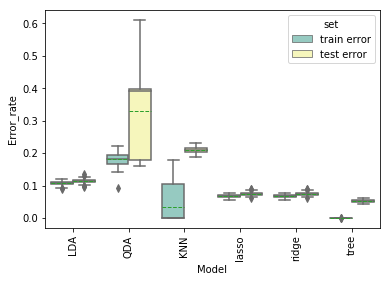

In [298]:
ax = sns.boxplot(x=df_new['Model'], y = df_new['Error_rate'], data=df_new, hue=df_new['set'],showmeans=True, meanline=True, palette = "Set3")
labels = ax.set_xticklabels(ax.get_xticklabels(),rotation=90)